# Projet Machine Learning


Le projet de ce module vise à améliorer l'évaluation des essais étudiants en utilisant le Machine Learning et le Traitement du Langage Naturel, en développant des modèles capables d'évaluer automatiquement les essais des étudiants, réduisant ainsi la nécessité de notation manuelle et le temps associé. 

Pour ce faire,  les étapes clés incluent la compréhension des données, l'exploration des données, l'entraînement des modèles, l'évaluation des performances, l'interprétation des résultats, et enfin, la sélection du meilleur modèle. Une documentation détaillée est attendue pour expliquer chaque étape du processus.

## Importation des Librairies pour Répondre au Besoin
Nous importons en premier nos libraires nécéssaires pour repondre au besoin


In [179]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer,  WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import re
import numpy as np
from sklearn.metrics import *
from skimpy import skim
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
from xgboost import XGBClassifier

## Lecture et compréhension des données

Nous commençons par charger nos données à partir d'un fichier CSV.

In [165]:

df = pd.read_csv('train.csv')
df

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\r\n\r\nThis is a letter to...",3
...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2
17303,ffddf1f,Technology has changed a lot of ways that we l...,4
17304,fff016d,If you don't like sitting around all day than ...,2
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1


Nous examinons les premières lignes à l'aide de df.head() pour comprendre la structure des données. 

In [166]:
df.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\r\n\r\nThis is a letter to...",3



Nous remarquons que notre ensemble de données comprend uniquement trois colonnes : une colonne pour l'identifiant de l'essaie, une colonne "full_text" représentant l'essai de l'étudiant, et enfin une colonne représentant le "score" ou la note attribuée à cet essai, qui est notre variable cible. Ainsi, notre objectif est d'utiliser la colonne "full_text" comme nos caractéristiques (X) que nous pouvons exploiter pour créer un modèle capable de prédire notre variable cible (Y), qui est le score.

In [167]:
X = df["full_text"]
X

0        Many people have car where they live. The thin...
1        I am a scientist at NASA that is discussing th...
2        People always wish they had the same technolog...
3        We all heard about Venus, the planet without a...
4        Dear, State Senator\r\n\r\nThis is a letter to...
                               ...                        
17302    the story " The Challenge of Exploing Venus " ...
17303    Technology has changed a lot of ways that we l...
17304    If you don't like sitting around all day than ...
17305    In "The Challenge of Exporing Venus," the auth...
17306    Venus is worthy place to study but dangerous. ...
Name: full_text, Length: 17307, dtype: object

In [168]:
y = df["score"]
y

0        3
1        3
2        4
3        4
4        3
        ..
17302    2
17303    4
17304    2
17305    1
17306    2
Name: score, Length: 17307, dtype: int64

Nous cherchons maintenant de comprendre plus notre dataset 

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17307 entries, 0 to 17306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   essay_id   17307 non-null  object
 1   full_text  17307 non-null  object
 2   score      17307 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 405.8+ KB


In [161]:
df.describe()

,score
count,17307.000000
mean,2.948402
std,1.044899
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,6.000000


In [169]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17307  │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd   ┃ p0   ┃ p25    ┃ p50    ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ score              │    0 │       0 │     2.9 │    1 │    1 │      2 │      3 │     4 │       6 │  ▂▆▇▅▁   │  │
│ └────────────────────┴──────┴─────────┴─────────┴──────┴──────┴────────┴────────┴───────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ essay_id                  │       0 │          0 │                            1 │                    17307 │  │
│ │ full_text                 │       0 │          0 │                          380 │                  6643794 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Maintenant, on essaye d'observer si le nombre d'occurences des mots dans les paragraphes est equitable. Voici un nuage e mots qu'il illustre les mots les plus fréquntés.

On peut remarquer que il ya des mots qu'ils sont beaucoup plus frequent que d'autres comme : "people", "car", "think", "driver", "less", "technology", ...

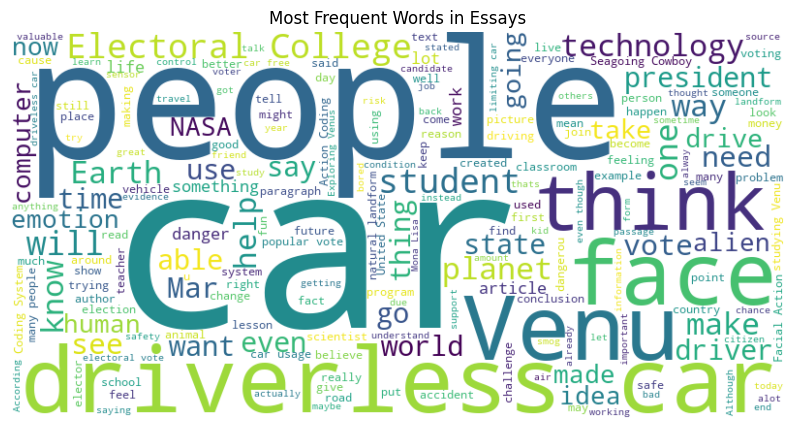

In [174]:


# Assuming your column containing paragraphs is named 'full_text'
text = ' '.join(df['full_text'])  # Concatenate all paragraphs into a single string

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Essays')
plt.show()

D'une maniere général, nous pouvons observer que notre ensemble de données comprend un total de 6,6 millions de mots répartis sur 17 000 exemples, ce qui équivaut à environ 380 mots par exemple. Cette quantité considérable nécessite l'utilisation d'approches de NLP telles que "tf-idf" et "bag of words" pour donner un sens à ces paragraphes en les vectorisant (tokenization). Ainsi, pour chaque exemple, nous obtiendrons un vecteur significatif qui peut être utilisé pour entraîner des modèles de machine learning dans la partie de selection de modele.




Maintenant, sachant que notre variable cible (Y) représente le score et est un entier, nous aimerions connaître la distribution des valeurs dans cette colonne.

In [175]:
y.nunique()

6

In [176]:
y.value_counts()

score
3    6280
2    4723
4    3926
1    1252
5     970
6     156
Name: count, dtype: int64


Nous pouvons conclure que nous avons 6 valeurs de score réparties en 6 classes attendues. Ainsi, il s'agit d'un problème de classification multi-classe.

## Exploration et transformation des données


Comme mentionné précédemment, afin d'obtenir un résultat de notre modèle, nous effectuons quelques prétraitements sur nos données textuelles.

- Tokenisation : Le texte est divisé en mots individuels.
- Suppression des mots vides : Les mots vides (stop words) de l'anglais sont retirés.
- Racinisation (Stemming) : Chaque mot est réduit à sa forme racine à l'aide de l'algorithme Porter Stemmer.
- Reconstitution du texte : Les mots racinisés sont réunis pour former une phrase cohérente.

On arrivera a la fin a une liste d'entrée ou chaque entrée represente un texte prétraitée de l'essaie apres avoir supprimer les mots vides et réduiser les mots à leur forme racine.

In [156]:


# Initialize the PorterStemmer
stemmer =  PorterStemmer()

def preprocess_text(text):
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    # Join the stemmed words back into a sentence
    stemmed_text = " ".join(stemmed_words)
    
    return stemmed_text

X = X.apply(preprocess_text)
X


0        mani peopl car live . thing n't know use car a...
1        scientist nasa discuss `` face '' mar . explai...
2        peopl alway wish technolog seen movi , best ne...
3        heard venu , planet without almost oxygen eart...
4        dear , state senat letter argu favor keep elec...
                               ...                        
17302    stori `` challeng explo venu `` inform piec da...
17303    technolog chang lot way live today . nowaday p...
17304    n't like sit around day great opportun partici...
17305    `` challeng expor venu , '' author suggest stu...
17306    venu worthi place studi danger . reaosn thei c...
Name: full_text, Length: 17307, dtype: object

In [138]:
X.shape

(17307,)

Nous avons remarqué auparavant que le problème peut être résolu en utilisant des méthodes de NLP telles que TF-IDF et le sac de mots (ou bag of words) pour donner un sens réel à nos essais. Ainsi, nous allons tester les deux méthodes de vectorisation et déterminer laquelle offre de meilleurs résultats que l'autre lors du choix du modèle.

### Bag of words 


La méthode de vectorisation Bag of Words (BoW) en NLP consiste à représenter un document textuel sous forme d'un vecteur où chaque élément correspond à la fréquence d'un mot dans le document. Cette approche ignore l'ordre des mots dans le texte et ne prend en compte que leur présence. Ainsi, chaque document est représenté par un vecteur de longueur égale au nombre total de mots dans le vocabulaire, où chaque élément du vecteur correspond à la fréquence du mot correspondant dans le document. Cette représentation permet de transformer des données textuelles en données numériques exploitables par les modèles de machine learning.

Afin de réduire la dimension des vecteurs, nous avons opté pour la conservation des 5000 features les plus significatives lors de notre tokenisation. Cependant, il est important de ne pas perdre d'informations pertinentes pour notre choix. Si nous choisissons un nombre très restreint de features, nous risquons de manquer des informations qui pourraient contribuer à améliorer les performances de notre modèle.

In [139]:

vectorizer = CountVectorizer(max_features=5000)
vectors = vectorizer.fit_transform(X).toarray()
vectors.shape


# # Create the TF-IDF vectorizer
# vectorizer = TfidfVectorizer()

# # Fit the vectorizer to the corpus and transform the text data into TF-IDF vectors
# vectors = vectorizer.fit_transform(X).toarray()

# # Print the shape of the TF-IDF vectors
# print(vectors.shape)

(17307, 5000)

Lorsque nous traitons des données de grande dimension comme un vecteur de shape (17307, 5000), il devient crucial de réduire la dimension de ces données pour rendre l'entraînement et la prédiction de résultats plus rapides et plus abordables d'ou l'importance d'utiliser les PCAs

#### PCA ( Analyse en Composantes Principale )
L'Analyse en Composantes Principales (PCA) est une technique de réduction de dimension utilisée pour explorer et visualiser des ensembles de données complexes. Elle consiste à projeter les données dans un nouvel espace de dimensions inférieures, tout en conservant autant que possible la variance des données d'origine

Avant de procéder aux PCA , il est important de normaliser les données contenues dans le tableau vectors. La normalisation est une étape importante dans le prétraitement des données, car elle permet de mettre toutes les caractéristiques à la même échelle, ce qui est souvent nécessaire pour améliorer les performances des modèles d'apprentissage automatique. 

In [140]:


scaler = StandardScaler()

vectors_modified = scaler.fit_transform(vectors)



Maintenant, nous effectuons une réduction de dimension sur les données normalisées auparavant. Nous indiquons à PCA de réduire la dimension à 200 composants principaux. Ensuite, PCA ajuste le modèle aux données normalisées et transforme ces données en utilisant les composants principaux calculés. Ce choix de 200 composants a été fait après plusieurs essais pour obtenir de bons scores des modèles testés par la suite.

In [141]:
pca = PCA(n_components=200)

X = pca.fit_transform(vectors_modified)

X.shape

(17307, 200)

## Entrainement des modeles 

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:

X_train.shape

(13845, 200)

In [145]:
X_test.shape

(3462, 200)

In [147]:


# Initialize models
models = {
    # 'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    # 'Support Vector Machine': SVC(kernel='linear'),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    # 'XGBoost Classifier' : XGBClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}


# Train and evaluate each model
for name, model in models.items():
    print(f"{name} ")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='weighted')
    print("Precision:", precision)

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='weighted')
    print("Recall:", recall)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1-score:", f1)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:")
    print(conf_matrix)

Logistic Regression 
Accuracy: 0.6048526863084922
Precision: 0.6018827382986208
Recall: 0.6048526863084922
F1-score: 0.5987982575846967
Confusion matrix:
[[ 76 154  28   2   0   0]
 [ 45 638 270  11   1   0]
 [ 21 248 843 150   3   0]
 [  1   9 243 456  31  10]
 [  0   0   2  96  64  21]
 [  0   0   0   2  20  17]]
Random Forest Classifier 
Accuracy: 0.5649913344887348
Precision: 0.5647401137480791
Recall: 0.5649913344887348
F1-score: 0.5409573842719311
Confusion matrix:
[[ 23 152  73  12   0   0]
 [  9 539 382  35   0   0]
 [  5 170 912 176   2   0]
 [  0   9 283 446  12   0]
 [  0   0  13 134  36   0]
 [  0   0   0  20  19   0]]
Gradient Boosting Classifier 


c:\Users\keske\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KeyboardInterrupt: 

In [148]:
df = pd.DataFrame({'y_true': y_pred, 'y_pred': y_test.to_numpy()})

df 

,y_true,y_pred
0,3,3
1,3,3
2,2,3
3,3,3
4,4,4
...,...,...
3457,3,1
3458,2,2
3459,3,2
3460,2,2


In [ ]:
# from sklearn.metrics import roc_curve

# n_classes = len(np.unique(y_pred))  # Get number of unique classes

# # Initialize lists to store data for all classes
# fpr_list, tpr_list, auc_scores = [], [], []
# for class_label in range(n_classes):
#   # One-vs-Rest - treat current class as positive, others as negative
#   y_true_ovr = np.where(y_test == class_label, 1, 0)
#   fpr, tpr, _ = metrics.roc_curve(y_true_ovr, y_pred)
#   auc = metrics.roc_auc_score(y_true_ovr, y_pred)
#   fpr_list.append(fpr)
#   tpr_list.append(tpr)
#   auc_scores.append(auc)
#   print(f"AUC Score (Class {class_label}): {auc}")

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score, KFold
# k = 10
# kf = KFold(n_splits=k, shuffle=True, random_state=42)


# # Initialize models
# models = {
#     # 'Multinomial Naive Bayes': MultinomialNB(),
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'Support Vector Machine': SVC(kernel='linear'),
#     'Random Forest Classifier': RandomForestClassifier(),
#     'Gradient Boosting Classifier': GradientBoostingClassifier(),
#     # 'XGBoost Classifier' : XGBClassifier(),
#     'Neural Network': MLPClassifier(max_iter=1000)
# }


# # Train and evaluate each model
# for name, model in models.items():
#     accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
#     precision_scores = cross_val_score(model, X, y, cv=kf, scoring='precision_weighted')
#     recall_scores = cross_val_score(model, X, y, cv=kf, scoring='recall_weighted')
#     f1_scores = cross_val_score(model, X, y, cv=kf, scoring='f1_weighted')

#     # Print average scores
#     print("Average Accuracy:", np.mean(accuracy_scores))
#     print("Average Precision:", np.mean(precision_scores))
#     print("Average Recall:", np.mean(recall_scores))
#     print("Average F1-score:", np.mean(f1_scores))